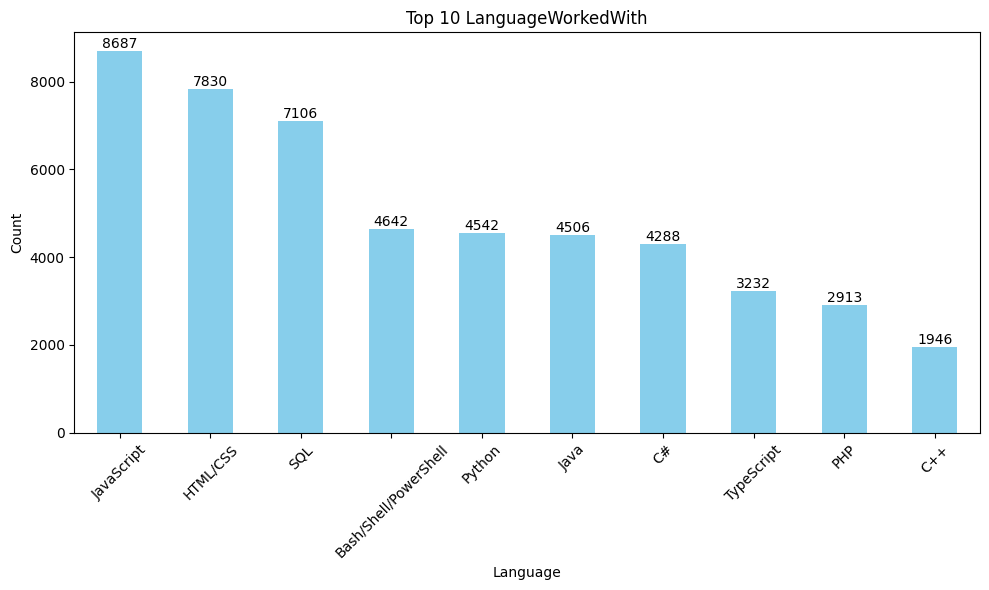

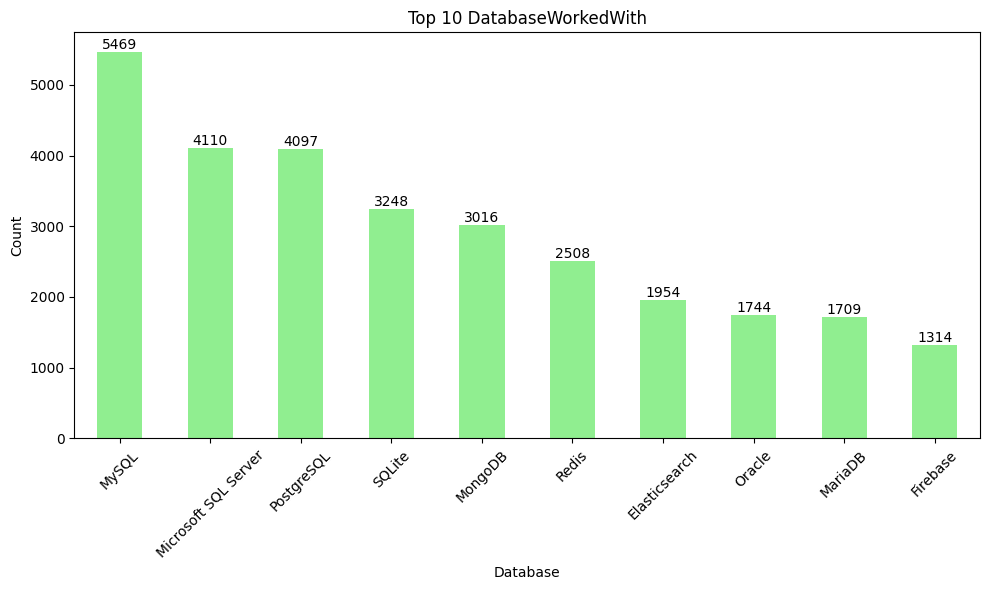

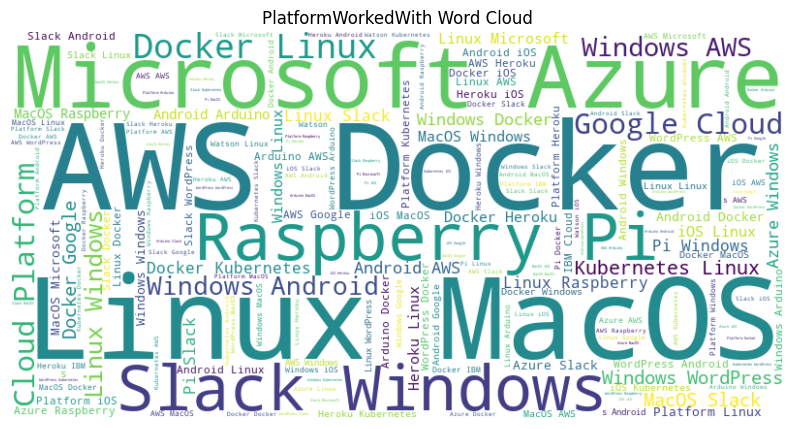

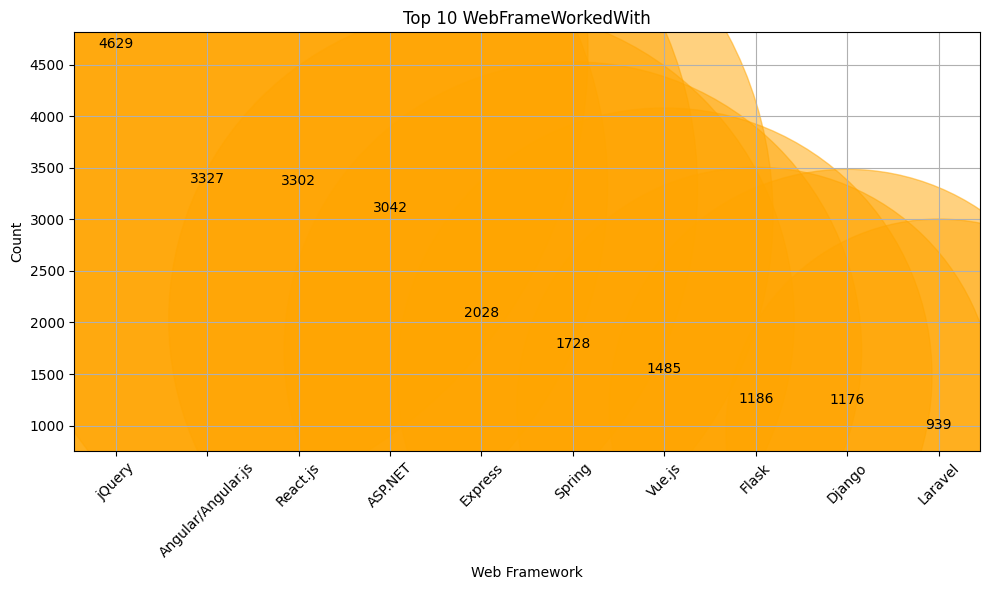

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud



demographics_data = pd.read_csv("C:\\Users\ACER\Downloads\m5_survey_data_demographics.csv")
data = pd.read_csv("C:\\Users\ACER\Downloads\m5_survey_data_technologies_normalised.csv")




# Panel 1: 
top_10_languages = data['LanguageWorkedWith'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_languages.plot(kind='bar', color='skyblue')
plt.title('Top 10 LanguageWorkedWith')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, value in enumerate(top_10_languages):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Panel 2: 
top_10_databases = data['DatabaseWorkedWith'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_databases.plot(kind='bar', color='lightgreen')
plt.title('Top 10 DatabaseWorkedWith')
plt.xlabel('Database')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, value in enumerate(top_10_databases):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Panel 3:
platforms = ' '.join(data['PlatformWorkedWith'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(platforms)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('PlatformWorkedWith Word Cloud')
plt.axis('off')
plt.show()

# Panel 4: 
top_10_web_frameworks = data['WebFrameWorkedWith'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.scatter(top_10_web_frameworks.index, top_10_web_frameworks.values, s=top_10_web_frameworks.values * 100, c='orange', alpha=0.5)
plt.title('Top 10 WebFrameWorkedWith')
plt.xlabel('Web Framework')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
for i, value in enumerate(top_10_web_frameworks):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()





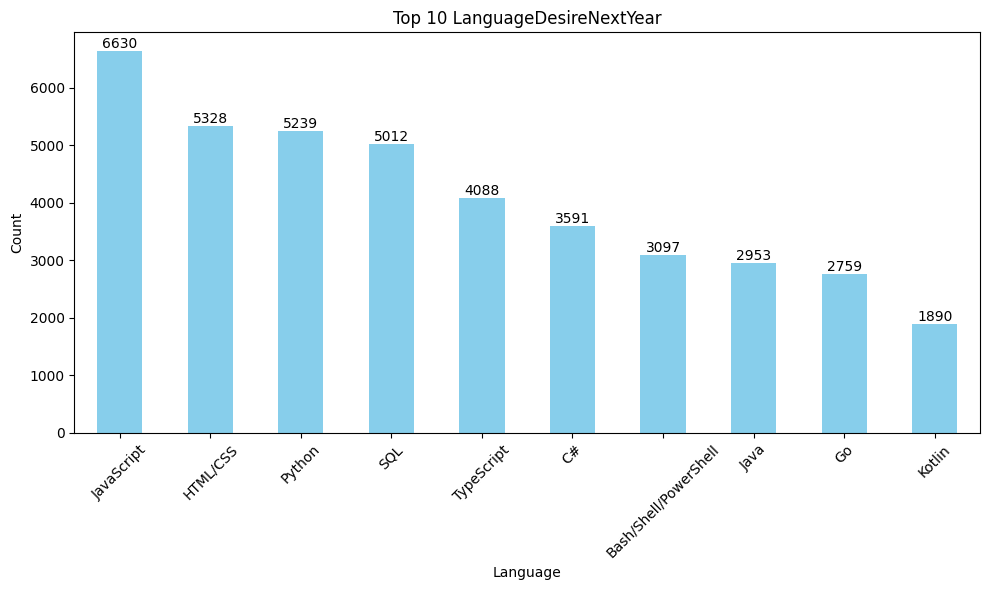

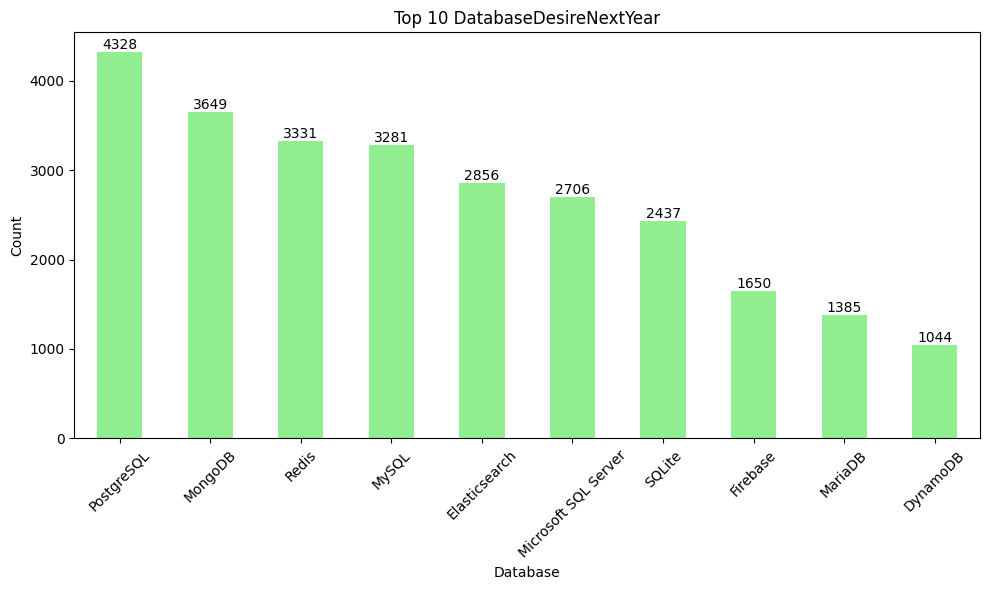

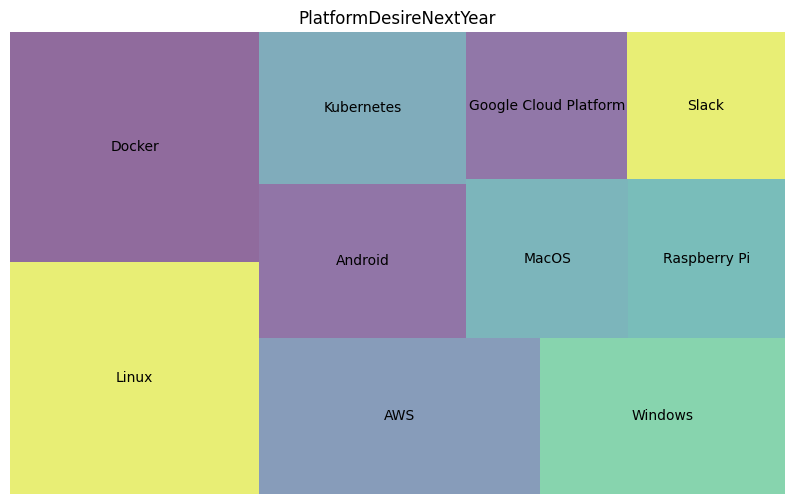

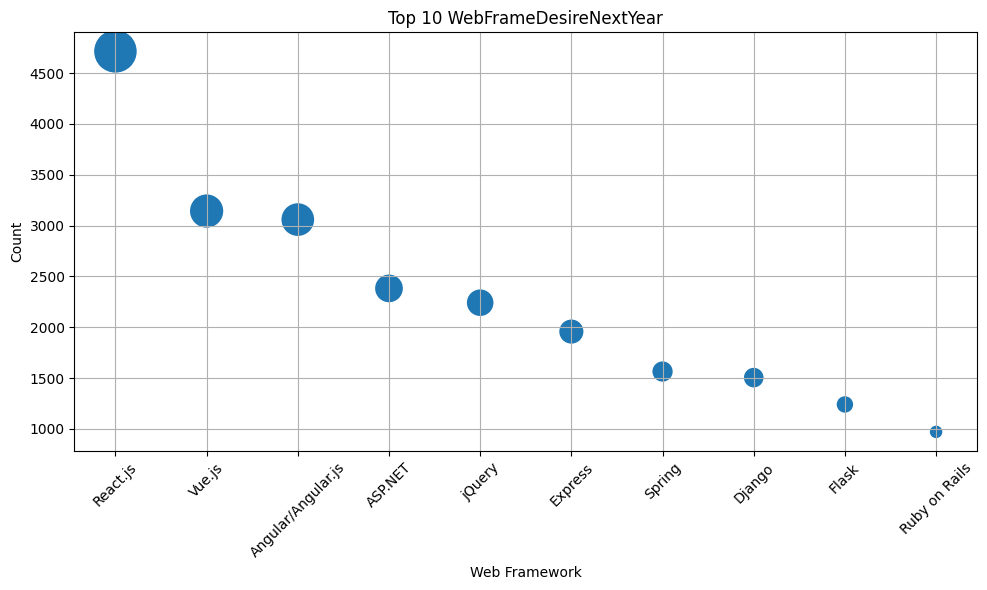

In [5]:

import squarify


# Panel 1: Top 10 LanguageDesireNextYear as Bar chart
top_10_languages_desire_next_year = data['LanguageDesireNextYear'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_languages_desire_next_year.plot(kind='bar', color='skyblue')
plt.title('Top 10 LanguageDesireNextYear')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, value in enumerate(top_10_languages_desire_next_year):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Panel 2: Top 10 DatabaseDesireNextYear as Column chart
top_10_databases_desire_next_year = data['DatabaseDesireNextYear'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_databases_desire_next_year.plot(kind='bar', color='lightgreen')
plt.title('Top 10 DatabaseDesireNextYear')
plt.xlabel('Database')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, value in enumerate(top_10_databases_desire_next_year):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Panel 3: PlatformDesireNextYear as Tree map chart
platforms_desire_next_year = data['PlatformDesireNextYear'].value_counts().head(10)
plt.figure(figsize=(10, 6))
squarify.plot(sizes=platforms_desire_next_year.values, label=platforms_desire_next_year.index, alpha=0.6)
plt.title('PlatformDesireNextYear')
plt.axis('off')
plt.show()

# Panel 4: Top 10 WebFrameDesireNextYear as Hierarchy bubble chart
top_10_web_frameworks_desire_next_year = data['WebFrameDesireNextYear'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_10_web_frameworks_desire_next_year.index, y=top_10_web_frameworks_desire_next_year.values, size=top_10_web_frameworks_desire_next_year.values, sizes=(100, 1000), legend=False)
plt.title('Top 10 WebFrameDesireNextYear')
plt.xlabel('Web Framework')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



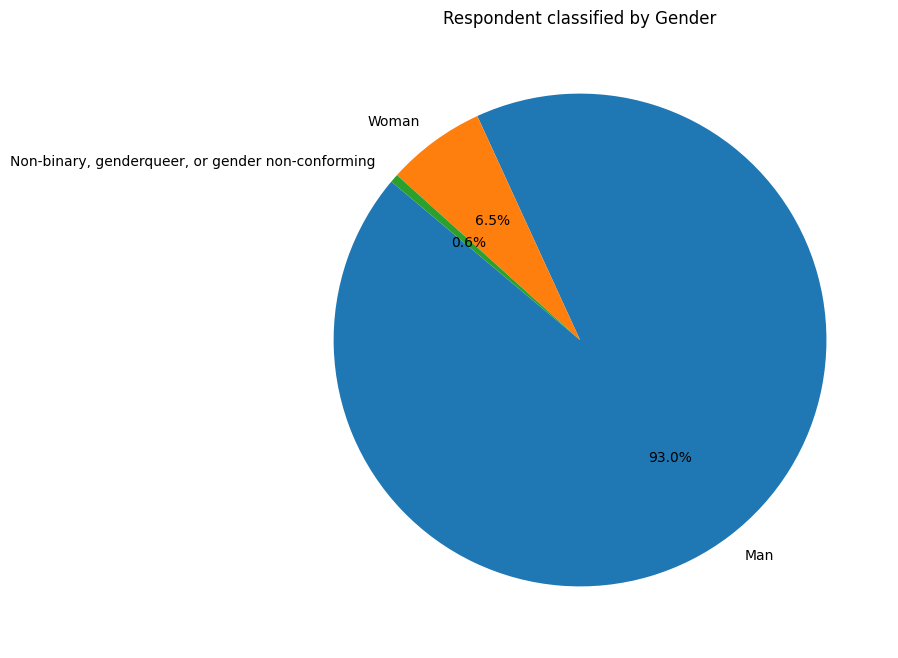

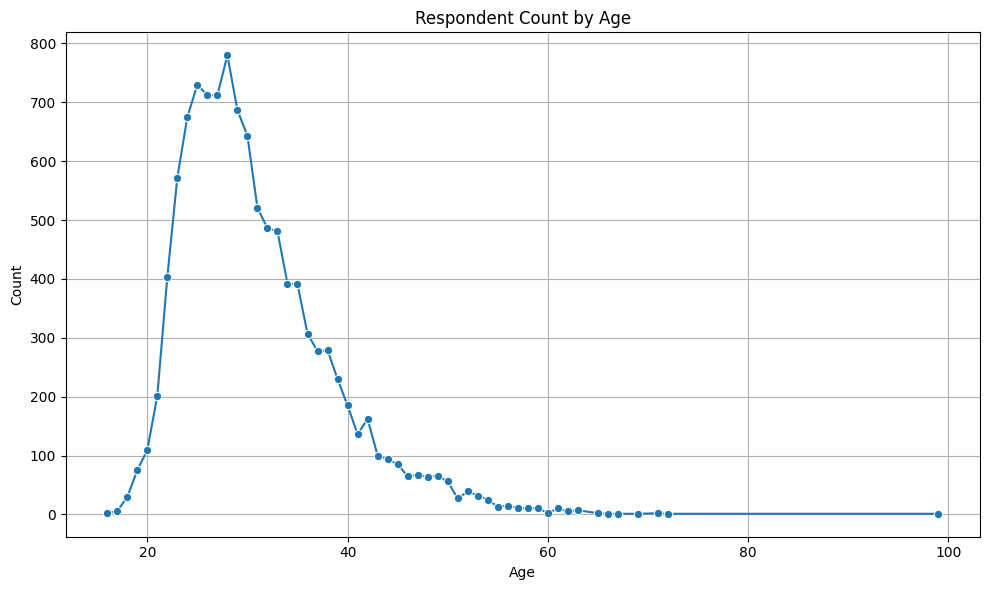

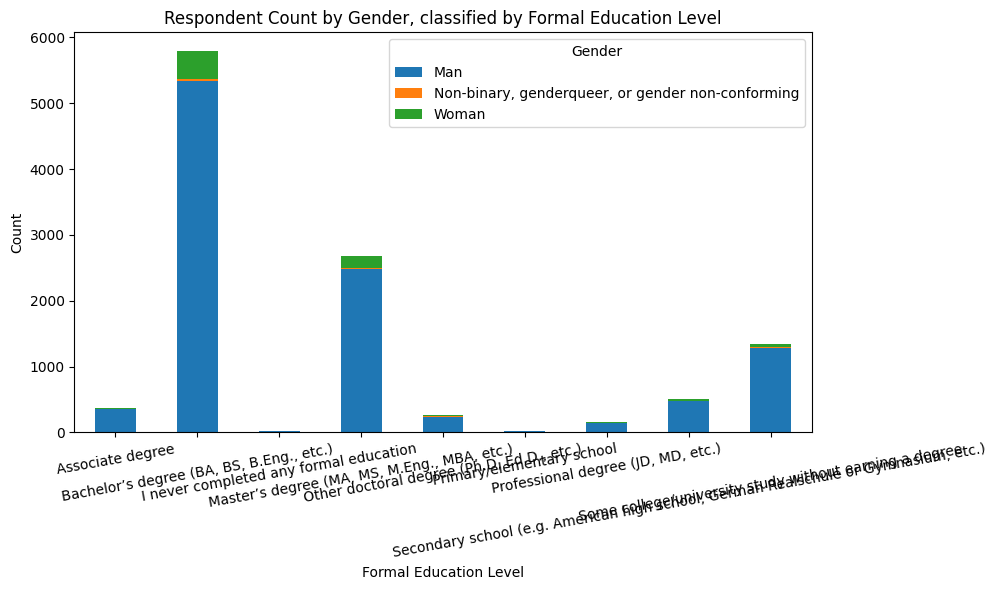

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Filter data for only 'Man', 'Woman', and 'Non-binary, genderqueer, or gender non-conforming' genders
demographics_data = pd.read_csv("C:\\Users\ACER\Downloads\m5_survey_data_demographics.csv")
filtered_data = demographics_data[demographics_data['Gender'].isin(['Man', 'Woman', 'Non-binary, genderqueer, or gender non-conforming'])]

# Panel 1: Respondent classified by Gender as Pie chart
gender_counts = filtered_data['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Respondent classified by Gender')
plt.show()

# Panel 2: Respondent Count for Countries as Map chart
country_counts = filtered_data['Country'].value_counts()
country_data = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})
fig = px.choropleth(country_data, locations='Country', locationmode='country names', color='Count', 
                    color_continuous_scale='Viridis', range_color=[0, max(country_counts)], 
                    title='Respondent Count for Countries')
fig.show()

# Panel 3: Respondent Count by Age as Line chart
age_counts = filtered_data['Age'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_counts.index, y=age_counts.values, marker='o')
plt.title('Respondent Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Panel 4: Respondent Count by Gender, classified by Formal Education Level as Stacked bar chart
education_gender_counts = filtered_data.groupby(['EdLevel', 'Gender']).size().unstack()
education_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Respondent Count by Gender, classified by Formal Education Level')
plt.xlabel('Formal Education Level')
plt.ylabel('Count')
plt.xticks(rotation=10)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
